In [1]:
import os
import sys

import json
import csv

In [2]:
sys.path.append("..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns
import pandas as pd

In [6]:
root = 'logs_from_tensorflow'

In [7]:
reward_columns = ['time', 'Steps', 'Rewards']
reward_csvs = {
    'Half': os.path.join(root, 'run_2_rewards.csv'),
    'Full': os.path.join(root, 'run_2_doublelengths2_rewards.csv'),
}

val_columns = ['time', 'Steps', 'L1 Error']
val_csvs = {
    'Half': os.path.join(root, 'run_2_l1.csv'),
    'Full': os.path.join(root, 'run_2_doublelengths2_l1.csv'),
}

In [8]:
dfs = []
for name, csv_path in reward_csvs.items():
    df = pd.read_csv(
        csv_path,
        sep=',',
        header=0,
    )
    df.columns = reward_columns
    df['Agent'] = pd.Series([name for _ in range(len(df.index))])
    dfs.append(df)

rewards = pd.concat(dfs).reset_index(drop=True)

In [9]:
# plt.rcParams['font.family'] = 'Times New Roman'

In [12]:
sns.set(style="darkgrid", font_scale=0.9, font="Arial")

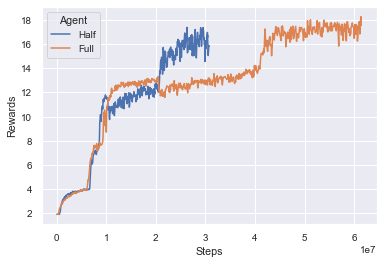

In [21]:
sns.lineplot(data=rewards, x="Steps", y="Rewards", hue="Agent")
plt.savefig('rewards.png')

In [14]:
dfs = []
for name, csv_path in val_csvs.items():
    df = pd.read_csv(
        csv_path,
        sep=',',
        header=0,
    )
    df.columns = val_columns
    df['Agent'] = pd.Series([name for _ in range(len(df.index))])
    dfs.append(df)

vals = pd.concat(dfs).reset_index(drop=True)

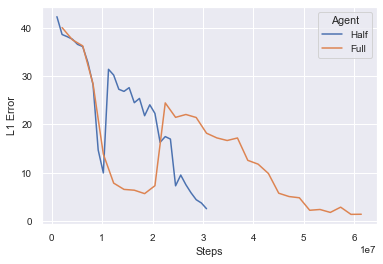

In [22]:
sns.lineplot(data=vals, x="Steps", y="L1 Error", hue="Agent")
plt.savefig('val_errors.png')

In [ ]:
plt.savefig('save_as_a_png.png')

Try to add continuous error graph by adding min and max per each step, given average window

In [23]:
from collections import deque

In [27]:
data = test_reward.values.tolist()

In [28]:
que = deque(maxlen=15)
new_data = []

for i, d in enumerate(data):
    time = d[0]
    steps = d[1]
    reward = d[2]
    
    que.append(reward)
    
    avg_reward = sum(que) / len(que)
    min_reward = min(que)
    max_reward = max(que)
    
    new_data.append([steps, avg_reward])
    new_data.append([steps, min_reward])
    new_data.append([steps, max_reward]) 

In [29]:
new_df = pd.DataFrame(new_data, columns=['Steps', 'Rewards'])

<AxesSubplot:xlabel='Steps', ylabel='Rewards'>

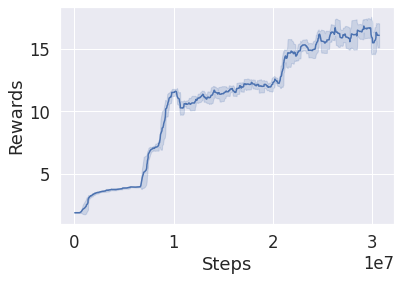

In [30]:
sns.lineplot(data=new_df, x="Steps", y="Rewards", ci='sd')